Electronic energy: -1.063653 Ha


/Users/ema/Documents/Python/quantum/Quantum-Examples/.qiskit_env/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


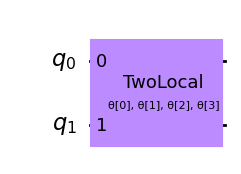

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2
service = QiskitRuntimeService()  # přihlášení přes IBM Quantum API token
backend = service.least_busy(operational=True, simulator=False)
estimator = EstimatorV2(mode=backend)

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator

# H2 Hamiltonian 2-qubit STO-3G
h2_paulis = [
    ("II", -1.052373245772859),
    ("ZI",  0.3979374248431808),
    ("IZ", -0.3979374248431808),
    ("ZZ", -0.01128010425623538),
    ("XX",  0.18093119978423156),
    ("YY",  0.18093119978423156)
]
h2_hamiltonian = SparsePauliOp.from_list(h2_paulis)

# Jednoduchý ansatz
ansatz = TwoLocal(num_qubits=2, rotation_blocks='ry', entanglement_blocks='cz', reps=1)

# VQE
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=SLSQP())
vqe.initial_point = [0.0] * ansatz.num_parameters

result = vqe.compute_minimum_eigenvalue(h2_hamiltonian)

print(f"Electronic energy: {result.eigenvalue.real:.6f} Ha")

# Vizualizace ansatzu
ansatz.draw(output='mpl')

